In [1]:
pip install -i https://test.pypi.org/simple/ MissingValImputerDats6450

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import numpy as np
from MissingValImputerDats6450.MissingValImputerDats6450 import MissingValImputerDats6450

In [3]:
dataframe = sns.load_dataset("diamonds")
dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
columns_with_missing = ['depth', 'table', 'x', 'z','y']
missing_percentage = 0.30

for column in columns_with_missing:
    mask = np.random.rand(len(dataframe)) < missing_percentage
    dataframe.loc[mask, column] = np.nan

dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,NaN,NaN,NaN
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,NaN,2.63
4,0.31,Good,J,SI2,63.3,NaN,335,NaN,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,NaN,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,NaN,2757,5.69,NaN,3.61
53937,0.70,Very Good,D,SI1,62.8,NaN,2757,NaN,NaN,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
%%time

mvh = MissingValImputerDats6450()
mvh.fit(dataframe, "price", categorical=["cut","color","clarity"])
dataframe = mvh.transform(dataframe)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 37733, number of used features: 9
[LightGBM] [Info] Start training from score 5.731079
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 37733, number of used features: 9
[LightGBM] [Info] Start training from score 5.731079
CPU times: total: 3 s
Wall time: 4.7 s


In [6]:
dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.980000,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,5.66,3.908600,3.51
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.070000,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.254712,2.63
4,0.31,Good,J,SI2,63.3,57.0,335,5.66,4.350000,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,61.8,57.0,2757,5.75,5.760000,3.50
53936,0.72,Good,D,SI1,63.1,57.0,2757,5.69,5.700255,3.61
53937,0.70,Very Good,D,SI1,62.8,57.0,2757,5.66,5.675048,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.120000,3.74


C:\Users\14848\AppData\Local\Temp\ipykernel_32436\2301860567.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True)


<Axes: >

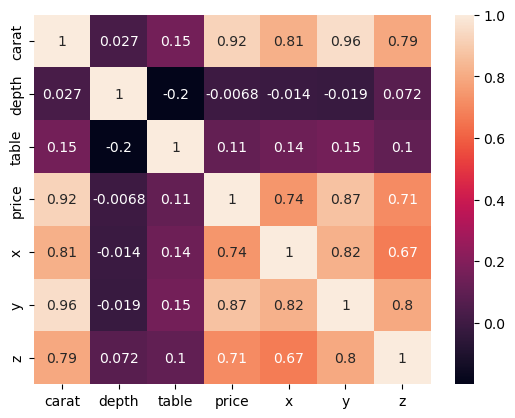

In [7]:
sns.heatmap(dataframe.corr(), annot=True)

In [8]:
df = sns.load_dataset('diamonds')

In [9]:
diff = df.corr()

C:\Users\14848\AppData\Local\Temp\ipykernel_32436\3757180529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diff = df.corr()


<Axes: >

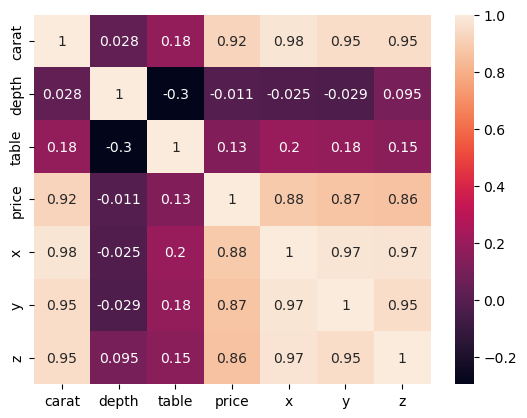

In [10]:
sns.heatmap(diff,annot  =True)

In [11]:
!pip install xgboost

In [ ]:
!pip install MissForest

In [13]:
from missforest.missforest import MissForest

In [14]:
dataframe1 = sns.load_dataset("diamonds")
dataframe1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
columns_with_missing = ['depth', 'table', 'x', 'z','y']
missing_percentage = 0.30

for column in columns_with_missing:
    mask = np.random.rand(len(dataframe1)) < missing_percentage
    dataframe1.loc[mask, column] = np.nan

dataframe1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,NaN,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,NaN,NaN,NaN
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,NaN,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,NaN,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,NaN,5.75,3.61
53937,0.70,Very Good,D,SI1,NaN,60.0,2757,5.66,5.68,NaN
53938,0.86,Premium,H,SI2,61.0,NaN,2757,6.15,6.12,3.74


In [16]:
%%time

mvht = MissForest()
mvht.fit(dataframe1, categorical=["cut","color","clarity"])
dataframe1 = mvh.transform(dataframe1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 37709, number of used features: 9
[LightGBM] [Info] Start training from score 5.736282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 37709, number of used features: 9
[LightGBM] [Info] Start training from score 5.736282
CPU times: total: 1.41 s
Wall time: 535 ms
